# Compare Bands

## Overview

The `pyprocar.bandsplot()` function is a powerful tool for visualizing electronic band structures. One of its key features is that it returns matplotlib `Figure` and `Axes` objects when `show=False`, which enables advanced plotting capabilities including comparing multiple band structures on the same plot.

### What bandsplot returns

When called with `show=False`, `bandsplot()` returns:
- `fig`: A matplotlib Figure object containing the entire plot
- `ax`: A matplotlib Axes object representing the plotting area

### Method for comparing band structures

To compare band structures from different codes or calculations:

1. **First call**: Use `bandsplot()` with `show=False` to generate the initial band structure and capture the `fig` and `ax` objects
2. **Subsequent calls**: Pass the `ax` object to additional `bandsplot()` calls using the `ax` parameter
3. **Final display**: The last call should have `show=True` to display the combined plot

This approach allows you to overlay multiple band structures from different DFT codes (like VASP and Quantum Espresso) or different calculations on the same axes for direct comparison.

## Example: Comparing VASP and Quantum Espresso Band Structures

In this tutorial, we'll compare Fe band structures calculated with both VASP and Quantum Espresso (QE) codes.

## Import libraries and download example data

First, we'll import the necessary libraries and download the example Fe band structure data for both VASP and Quantum Espresso calculations.

In [1]:
# Import required libraries
from pathlib import Path
import pyprocar

CURRENT_DIR = Path(".").resolve()
print(str(CURRENT_DIR))
COMPARE_BANDS_PATH = "data/examples/bands/compare_bands"

pyprocar.download_from_hf(relpath=COMPARE_BANDS_PATH, output_path=CURRENT_DIR)
QE_DATA_DIR = CURRENT_DIR / COMPARE_BANDS_PATH / "qe"
VASP_DATA_DIR = CURRENT_DIR / COMPARE_BANDS_PATH / "vasp"
print(f"Data downloaded to: {QE_DATA_DIR}")
print(f"Data downloaded to: {VASP_DATA_DIR}")

C:\Users\lllang\Desktop\notebooks\Notebook\01 - Projects\Pyprocar\pyprocar\examples\00-band_structure
Data already exists at C:\Users\lllang\Desktop\notebooks\Notebook\01 - Projects\Pyprocar\pyprocar\examples\00-band_structure\data\examples\bands\compare_bands
Data downloaded to: C:\Users\lllang\Desktop\notebooks\Notebook\01 - Projects\Pyprocar\pyprocar\examples\00-band_structure\data\examples\bands\compare_bands\qe
Data downloaded to: C:\Users\lllang\Desktop\notebooks\Notebook\01 - Projects\Pyprocar\pyprocar\examples\00-band_structure\data\examples\bands\compare_bands\vasp


## Comparing band structures

Now we'll demonstrate the band comparison technique:

1. **Step 1**: Plot the VASP band structure with `show=False` to capture the `fig` and `ax` objects
2. **Step 2**: Plot the QE band structure using the same `ax` object and `show=True` to display the combined result

The VASP bands will be plotted in parametric mode (showing orbital contributions with colors) while the QE bands will be overlaid in plain mode (black lines) for clear comparison.

C:\Users\lllang\Desktop\notebooks\Notebook\01 - Projects\Pyprocar\pyprocar\examples\00-band_structure\data\examples\bands\compare_bands\vasp
If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
[INFO] 2025-07-13 08:32:37 - pyprocar.core.ebs[1034][from_code] - Parsing EBS calculation directory: C:\Users\lllang\Desktop\notebooks\Notebook\01 - Projects\Pyprocar\pyprocar\examples\00-band_structure\data\examples\bands\compare_bands\vasp
[INFO] 2025-07-13 08:32:37 - pyprocar.io.vasp[50][__init__] - Vasp Version: 6.2.1
[DEBUG] 2025-07-13 08:32:37 - pyprocar.io.vasp[159][get_symmetry_operations] - n_spg_operations: 48
[INFO] 2025-07-13 08:32:37 - pyprocar.io.vasp[314][get_symmetry_operations]

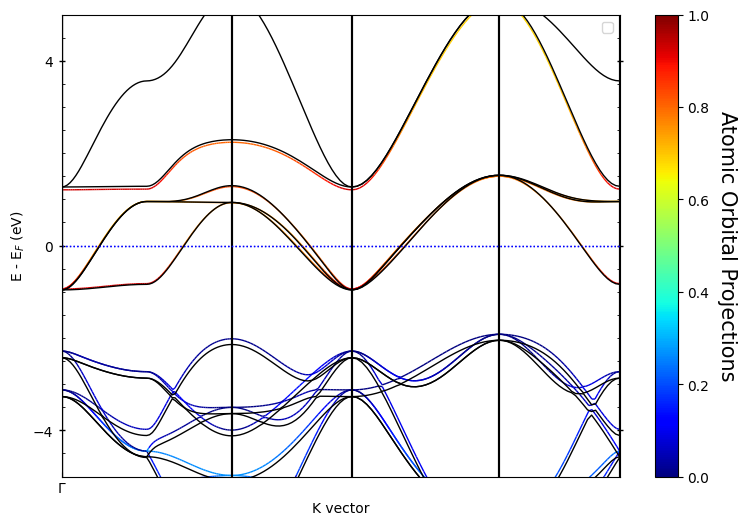

(<Figure size 900x600 with 2 Axes>,
 <Axes: xlabel='K vector', ylabel='E - E$_F$ (eV)'>)

In [2]:
print(str(VASP_DATA_DIR))
# Step 1: Plot VASP band structure and capture fig, ax objects
fig, ax = pyprocar.bandsplot(
    code="vasp",
    dirname=str(VASP_DATA_DIR),
    mode="parametric",
    fermi=5.3017,  # VASP fermi energy
    elimit=[-5, 5],
    orbitals=[4, 5, 6, 7, 8],  # d orbitals for Fe
    use_cache=False,
    show=False,  # Don't show yet, capture the axes
    quiet_welcome=True,
    verbose=3,
)

# # Step 2: Plot QE band structure on the same axes
pyprocar.bandsplot(
    code="qe",
    dirname=QE_DATA_DIR,
    mode="plain",
    fermi=12.5491,  # QE fermi energy
    elimit=[-5, 5],
    color="k",  # Black lines for QE bands
    ax=ax,  # Use the same axes from VASP plot
    show=True,  # Show the combined plot
    verbose=3,
)